In [29]:
from __future__ import division
import json
import re, collections
import numpy as np
import os
base_dir=os.path.expanduser('~')
import datetime
import time
import psycopg2
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 24})

Populating the interactive namespace from numpy and matplotlib


<h1> connect to DB </h1>

In [30]:
conn = psycopg2.connect("host=localhost port=5432 dbname=emoji_db user=postgres password=darkmatter")
cur = conn.cursor()

In [ ]:
cur.execute("SELECT date_trunc('day', TD.date) AS Day, \
SUM(CASE WHEN HE.has_emoji THEN 1 ELSE 0 END)::FLOAT/COUNT(HE.has_emoji) as emjFraction \
FROM has_emoji HE join tweet_dump TD on HE.tweet_id=TD.id \
GROUP BY 1 ORDER BY 1;")

In [ ]:
cur.execute("SELECT date_trunc('day', TD.date) AS Day, \
SUM(CASE WHEN HE.has_emoji THEN 1 ELSE 0 END)::int as numWithemoji, COUNT(HE.has_emoji)::int as total, max(TD.id) \
FROM has_emoji HE join tweet_dump TD on HE.tweet_id=TD.id \
GROUP BY 1 ORDER BY 1;")

In [17]:
result=np.array(cur.fetchall())

In [18]:
result

array([], dtype=float64)

In [14]:
date,N, total = result[:,0], result[:,1], result[:,2]
plt.plot(date,N/total,'k-')
ax = gca()
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d %b\n%Y'))

IndexError: too many indices for array

<h1> count number of tweets mined per day, and processed (counting emojis) </h1>

In [21]:
cur.execute("SELECT date_trunc('day', created_at) AS Day, \
COUNT(*)::int as N \
FROM emoji_tweet \
GROUP BY 1 ORDER BY 1;")

result=np.array(cur.fetchall())

<h3> We have date (proccessed), created_at (GMT of tweet), and date from tweet_dump when it was mined (similar to created_at) </h3>

In [45]:
#check with day since Jan 1 grouping 
cur.execute("SELECT COUNT(*) as N, \
extract(days from created_at-'2016-01-01'::date) as days \
from emoji_tweet \
GROUP BY days ORDER BY days;")

In [ ]:
result=np.array(cur.fetchall())

In [15]:
N_e, days_e = result[:,0], result[:,1]
plt.plot(days_e,N_e)
ax = gca()
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d %b\n%Y'))

NameError: name 'date' is not defined

<h3> Double check grouping by day... also try by week </h3>

In [32]:
cur.execute("SELECT COUNT(*) as N, \
extract(days from created_at-'2016-01-01'::date) as days \
from tweet_dump \
GROUP BY days ORDER BY days;")

In [33]:
result=np.array(cur.fetchall())

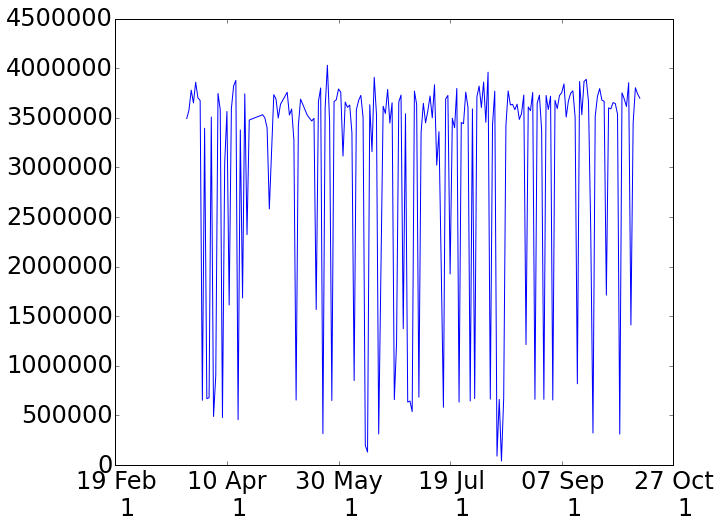

In [42]:
N, days = result[:,0], result[:,1]
plt.plot(days,N)
ax = gca()
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d %b\n%Y'))

<h3> check tweet_dump rate </h3>

In [ ]:
cur.execute("SELECT date_trunc('day', created_at) AS Day, \
COUNT(*)::int as N \
FROM tweet_dump \
GROUP BY 1 ORDER BY 1;")

result=np.array(cur.fetchall())

In [ ]:
date, N= result[:,0], result[:,1]
plt.plot(date,N)

<h1> Emoji usage per tweet </h1>

In [8]:
cur.execute("SELECT date_trunc('day', created_at) AS Day, \
SUM(emojiCountSum)::FLOAT/COUNT(emojiCountSum) as emjPerTweet \
FROM emoji_tweet \
GROUP BY 1 ORDER BY 1;")
result=np.array(cur.fetchall())

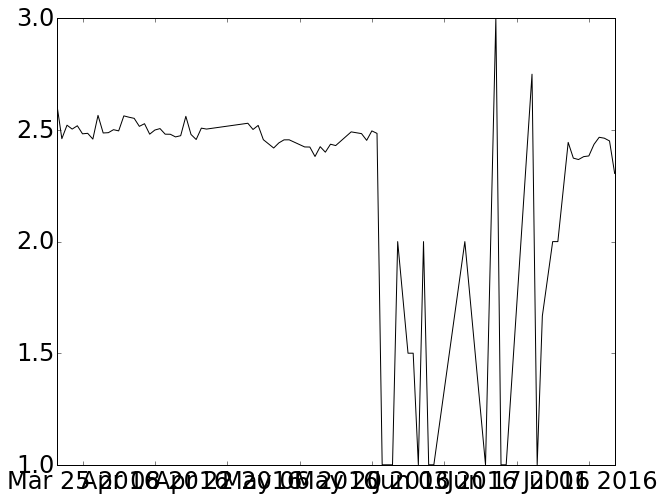

In [9]:
date,y = result[:,0], result[:,1]
plt.plot(date,y,'k-')